In [ ]:
import h5py
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding, GlobalAveragePooling2D, Input, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

In [ ]:
!pip install opencv-python numpy h5py torch transformers

In [ ]:
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
folder_path = '/content/drive/MyDrive/tvsum50_ver_1_1/ydata-tvsum50-v1_1/ydata-tvsum50-video/video/'  # Update as necessary
video_files = [f for f in os.listdir(folder_path)]  # Adjust extensions if needed
print(video_files)  # This will show all video files

['0tmA_C6XwfM.mp4', '37rzWOQsNIw.mp4', '-esJrBWj2d8.mp4', '3eYKfiOEJNs.mp4', 'AwmHb44_ouw.mp4', 'b626MiF1ew4.mp4', 'Bhxk-O1Y7Ho.mp4', '4wU_LUjG5Ic.mp4', '_xMr-HKMfVA.mp4', '91IHQYk1IQM.mp4', 'akI8YFjEmUw.mp4', '98MoyGZKHXc.mp4', 'EE-bNr36nyA.mp4', 'EYqVtI9YWJA.mp4', 'byxOvuiIJV0.mp4', 'eQu1rNs0an0.mp4', 'E11zDS9XGzg.mp4', 'cjibtmSLxQ4.mp4', 'HT5vyqe0Xaw.mp4', 'gzDbaEs1Rlg.mp4', 'iVt07TCkFM0.mp4', 'Hl-__g2gn_A.mp4', 'i3wAGJaaktw.mp4', 'fWutDQy1nnY.mp4', 'GsAD1KT1xo8.mp4', 'oDXZc0tZe04.mp4', 'jcoYJXDG9sw.mp4', 'LRw_obCPUt0.mp4', 'JgHubY5Vw3Y.mp4', 'J0nA4VgnoCo.mp4', 'JKpqYvAdIsw.mp4', 'kLxoNp-UchI.mp4', 'NyBmCxDoHJU.mp4', 'qqR6AEXwxoQ.mp4', 'vdmoEJ5YbrQ.mp4', 'PJrm840pAUI.mp4', 'Se3oxnaPsz0.mp4', 'uGu_10sucQo.mp4', 'RBCABdttQmI.mp4', 'VuWGsYPqAX8.mp4', 'sTEELN-vY30.mp4', 'xwqBXPGE9pQ.mp4', 'Yi4Ij2NM7U4.mp4', 'WxtbjNsCQ8A.mp4', 'WG0MBPpPC6I.mp4', 'xmEERLqJ2kU.mp4', 'XzYM3PfTM4w.mp4', 'XkqCExn6_Us.mp4', 'xxdtq8mxegs.mp4', 'z_6gVvQb2d0.mp4']


In [ ]:
import cv2

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/tvsum50_ver_1_1/ydata-tvsum50-v1_1/ydata-tvsum50-data/data/ydata-tvsum50-anno.tsv", sep='\t', header=None)
df

,0,1,2
0,AwmHb44_ouw,VT,"4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,..."
1,AwmHb44_ouw,VT,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
2,AwmHb44_ouw,VT,"3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,..."
3,AwmHb44_ouw,VT,"4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,..."
4,AwmHb44_ouw,VT,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
...,...,...,...
995,-esJrBWj2d8,DS,"4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,..."
996,-esJrBWj2d8,DS,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
997,-esJrBWj2d8,DS,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
998,-esJrBWj2d8,DS,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."


In [ ]:
import keras

In [ ]:
!pip install moviepy

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from moviepy.editor import VideoFileClip

In [ ]:
import cv2
import numpy as np
import torch
import torchvision.models as models
import torchvision.transforms as transforms

# Load a pre-trained ResNet model for feature extraction
model = models.resnet50(pretrained=True)
model = model.eval()  # Set model to evaluation mode

# Define a transform to match the input size and requirements of ResNet
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),  # Resize to reduce computational load
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


  warnings.warn(

  warnings.warn(msg)



In [ ]:
def load_tsv_files(info_file, anno_file):
    titles_df = pd.read_csv(info_file, sep='\t', header=0)
    annotations_df = pd.read_csv(anno_file, sep='\t', header=None)
    return titles_df, annotations_df

In [ ]:
def load_thumbnails(thumbnail_dir):
    thumbnails = []
    for filename in sorted(os.listdir(thumbnail_dir)):
        img = cv2.imread(os.path.join(thumbnail_dir, filename))
        if img is not None:
            thumbnails.append(cv2.resize(img, (224, 224)))  # Resize for CNN input
    return np.array(thumbnails)

In [ ]:
def extract_text_features(titles):
    title = titles['title'].values
    video_ids = titles['video_id'].values

    # Initialize the TF-IDF vectorizer
    vectorizer = TfidfVectorizer(max_features=1000)
    text_features = vectorizer.fit_transform(title).toarray()

    # Combine video_ids with text_features
    text_features_with_id = np.hstack((video_ids.reshape(-1, 1), text_features))

    return text_features_with_id

In [ ]:
def extract_video_features(video_path):
    video_features = []
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            # Preprocess frame for model input
            frame_tensor = preprocess(frame).unsqueeze(0)  # Add batch dimension
            with torch.no_grad():
                features = model(frame_tensor)
            video_features.append(features.numpy())

        frame_count += 1

    cap.release()
    return np.array(video_features)

In [ ]:
def extract_thumbnail_features(thumbnail_path):
    image = cv2.imread(thumbnail_path)
    if image is None:
        return None  # Handle missing files gracefully

    # Preprocess and extract features
    image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        features = model(image_tensor)
    return features.numpy()

In [ ]:
def fuse_features(text_features, visual_features, video_features):
    fused_features = np.concatenate([text_features, visual_features, video_features], axis=1)
    return fused_features

In [ ]:
def fusion_features(video_features, title, relevance_score, thumbnail_features):
    # Basic concatenation fusion; can be customized for weighted or attention-based fusion
    title_feature = np.mean([ord(char) for char in title])  # Simplistic numerical representation of title
    relevance_feature = np.array([relevance_score])  # Relevance as a single feature
    fusion = np.concatenate((video_features.flatten(), relevance_feature, [title_feature], thumbnail_features.flatten()))
    return fusion

In [ ]:
def build_summarization_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output summarization score
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
info_file = '/content/drive/MyDrive/tvsum50_ver_1_1/ydata-tvsum50-v1_1/ydata-tvsum50-data/data/ydata-tvsum50-info.tsv'
anno_file = '/content/drive/MyDrive/tvsum50_ver_1_1/ydata-tvsum50-v1_1/ydata-tvsum50-data/data/ydata-tvsum50-anno.tsv'
thumbnail_dir = '/content/drive/MyDrive/tvsum50_ver_1_1/ydata-tvsum50-v1_1/ydata-tvsum50-thumbnail/thumbnail'
video_dir = '/content/drive/MyDrive/tvsum50_ver_1_1/ydata-tvsum50-v1_1/ydata-tvsum50-video/video'

In [ ]:
titles_df, annotations_df = load_tsv_files(info_file, anno_file)

In [ ]:
titles_df

,category,video_id,title,url,length
0,VT,AwmHb44_ouw,#1306 How to change tires for off road vehicle...,https://www.youtube.com/watch?v=AwmHb44_ouw,5:54
1,VT,98MoyGZKHXc,How to use a tyre repair kit - Which? guide,https://www.youtube.com/watch?v=98MoyGZKHXc,3:07
2,VT,J0nA4VgnoCo,#0001: FLAT TIRE,https://www.youtube.com/watch?v=J0nA4VgnoCo,9:44
3,VT,gzDbaEs1Rlg,ŠKODA Tips How to Repair Your Tyre,https://www.youtube.com/watch?v=gzDbaEs1Rlg,4:48
4,VT,XzYM3PfTM4w,When to Replace Your Tires GMC,https://www.youtube.com/watch?v=XzYM3PfTM4w,1:51
5,VU,HT5vyqe0Xaw,"The stuck truck of Mark, The rut that filled a...",https://www.youtube.com/watch?v=HT5vyqe0Xaw,5:22
6,VU,sTEELN-vY30,BBC - Train crash 2013,https://www.youtube.com/watch?v=sTEELN-vY30,2:29
7,VU,vdmoEJ5YbrQ,#453 girl gets van stuck in the back fourty [D...,https://www.youtube.com/watch?v=vdmoEJ5YbrQ,5:29
8,VU,xwqBXPGE9pQ,Smart Electric Vehicle Balances on Two Wheels,https://www.youtube.com/watch?v=xwqBXPGE9pQ,3:53
9,VU,akI8YFjEmUw,Electric cars making earth more green,https://www.youtube.com/watch?v=akI8YFjEmUw,2:13


In [ ]:
print(titles_df.columns)

Index(['category', 'video_id', 'title', 'url', 'length'], dtype='object')


In [ ]:
annotations_df.columns=['video_id', 'category', 'annotations']

In [ ]:
annotations_df

,video_id,category,annotations
0,AwmHb44_ouw,VT,"4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,..."
1,AwmHb44_ouw,VT,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
2,AwmHb44_ouw,VT,"3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,..."
3,AwmHb44_ouw,VT,"4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,..."
4,AwmHb44_ouw,VT,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
...,...,...,...
995,-esJrBWj2d8,DS,"4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,..."
996,-esJrBWj2d8,DS,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
997,-esJrBWj2d8,DS,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
998,-esJrBWj2d8,DS,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."


In [ ]:
titles = titles_df[['video_id', 'title']]

In [ ]:
annotations = annotations_df[['video_id','annotations']]

In [ ]:
thumbnails = load_thumbnails(thumbnail_dir)
thumbnails = thumbnails / 255.0

In [ ]:
text_features = extract_text_features(titles)

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

In [ ]:
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

In [ ]:
def extract_features_from_videos_in_folder(folder_path, model, frame_interval=30):
    """
    Extract features from all video files in a specified folder using a pre-trained model.

    Parameters:
    - folder_path: str, path to the folder containing video files.
    - model: Keras Model, pre-trained model to extract features.
    - frame_interval: int, interval at which to process frames (default is every 30th frame).

    Returns:
    - all_features: dictionary where keys are video file names and values are lists of feature vectors.
    """
    all_features = {}

    # List all files in the folder and filter for video files
    video_files = [f for f in os.listdir(folder_path) if f.endswith('.mp4') or f.endswith('.avi')]

    for video_name in video_files:
        video_path = os.path.join(folder_path, video_name)
        print(f"Processing {video_name}...")

        # Initialize a list to hold features for this video
        features_list = []

        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error: Could not open video file {video_path}")
            continue  # Skip this video if it can't be opened

        frame_count = 0
        while True:
            ret, frame = cap.read()
            if not ret:
                print(f"End of video or read error for {video_name}")
                break

            if frame_count % frame_interval == 0:
                try:
                    # Resize and preprocess the frame
                    img = cv2.resize(frame, (224, 224))
                    img_array = image.img_to_array(img)
                    img_array = np.expand_dims(img_array, axis=0)
                    img_array = preprocess_input(img_array)

                    # Extract features using the model
                    features = model.predict(img_array)
                    features_list.append(features.flatten())
                    print(f"Extracted features for frame {frame_count} of {video_name}")

                except Exception as e:
                    print(f"Error processing frame {frame_count} of {video_name}: {e}")

            frame_count += 1

        cap.release()
        all_features[video_name] = features_list  # Store features for this video

    return all_features

In [ ]:
def extract_features_from_thumbnails(thumbnail_folder, model):
    """
    Extract features from all thumbnails in the specified folder using a pre-trained model.

    Parameters:
    - thumbnail_folder: str, path to the folder containing thumbnail images.
    - model: Keras Model, pre-trained model to extract features.

    Returns:
    - thumbnail_features: dictionary where keys are thumbnail file names and values are feature vectors.
    """
    thumbnail_features = {}

    # List all files in the folder and filter for image files (assuming .jpg or .png)
    image_files = [f for f in os.listdir(thumbnail_folder) if f.endswith('.jpg') or f.endswith('.png')]

    for image_name in image_files:
        image_path = os.path.join(thumbnail_folder, image_name)
        print(f"Processing {image_name}...")

        try:
            # Load, resize, and preprocess the image
            img = image.load_img(image_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            # Extract features using the model
            features = model.predict(img_array)
            thumbnail_features[image_name] = features.flatten()
            print(f"Extracted features for {image_name}")

        except Exception as e:
            print(f"Error processing {image_name}: {e}")

    return thumbnail_features

In [ ]:
thumbnail_folder_path="/content/drive/MyDrive/tvsum50_ver_1_1/ydata-tvsum50-v1_1/ydata-tvsum50-thumbnail/thumbnail"

In [ ]:
thumbnail_features = extract_features_from_thumbnails(thumbnail_folder_path, model)

Processing 91IHQYk1IQM.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Extracted features for 91IHQYk1IQM.jpg
Processing 0tmA_C6XwfM.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step
Extracted features for 0tmA_C6XwfM.jpg
Processing 4wU_LUjG5Ic.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
Extracted features for 4wU_LUjG5Ic.jpg
Processing 3eYKfiOEJNs.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Extracted features for 3eYKfiOEJNs.jpg
Processing 37rzWOQsNIw.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Extracted features for 37rzWOQsNIw.jpg
Processing -esJrBWj2d8.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Extracted features for -esJrBWj2d8.jpg
Processing xxdtq8mxegs.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Extracted features for xxdtq8mxegs.jpg
Processing cjibtmSLxQ4.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted features for cjibtmSLxQ4.jpg
Processing gzDbaEs1Rlg.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Extracted features for gzDbaEs1Rlg.jpg
Processing EYqVtI9YWJA.jpg...
1/1 ━━━━━━━━━━━━━━━

In [ ]:
all_video_features = extract_features_from_videos_in_folder(video_dir, model)

Streaming output truncated to the last 5000 lines.
Extracted features for frame 4500 of VuWGsYPqAX8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
Extracted features for frame 4530 of VuWGsYPqAX8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
Extracted features for frame 4560 of VuWGsYPqAX8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
Extracted features for frame 4590 of VuWGsYPqAX8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
Extracted features for frame 4620 of VuWGsYPqAX8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
Extracted features for frame 4650 of VuWGsYPqAX8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
Extracted features for frame 4680 of VuWGsYPqAX8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
Extracted features for frame 4710 of VuWGsYPqAX8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
Extracted features for frame 4740 of VuWGsYPqAX8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
Extracted features for frame 4770 of VuWGsYPqAX8.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
Extracted features for frame 

In [ ]:
np.save('all_videos_features.npy', all_video_features)
print("Feature extraction complete and saved.")

Feature extraction complete and saved.


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
def fuse_features( text_features,visual_features, video_features, target_shape=(128,)):
    # Ensure text_features and visual_features are numpy arrays
    #text_features = np.array(text_features)
    visual_features = np.array(visual_features)

    # Flatten the video features if needed and pad/resize to a target shape
    video_features_list = [np.resize(v, target_shape) if len(v) != target_shape[0] else v for v in video_features.values()]
    video_features = np.array(video_features_list)

    # Standardize features if needed
    scaler = StandardScaler()
    #text_features = scaler.fit_transform(text_features)
    visual_features = scaler.fit_transform(visual_features)
    video_features = scaler.fit_transform(video_features)

    # Check shape consistency
    max_rows = min(len(text_features), len(visual_features), len(video_features))

    # Concatenate along axis 1
    fused_features = np.concatenate([ visual_features[:max_rows], video_features[:max_rows]], axis=1)
    return fused_features


In [ ]:
thumbnails.reshape(len(thumbnails), -1)

In [ ]:
def build_early_fusion_model(text_features,visual_features, video_features):
    # Text Model
    x_text = Embedding(input_dim=10000, output_dim=128)(text_features)
    x_text = LSTM(64)(x_text)

    # Image Model
    image_input = visual_features.resize(224, 224, 3)
    base_model = ResNet50(weights='imagenet', include_top=False)
    x_image = base_model(image_input)
    x_image = GlobalAveragePooling2D()(x_image)

    # video Model
    video_input = all_video_features.resize(224, 224, 3)
    base_model = ResNet50(weights='imagenet', include_top=False)
    x_video = base_model(image_input)
    x_video = GlobalAveragePooling2D()(x_image)
    # Early Fusion
    x = Concatenate()([x_text, x_image, x_video])
    x = Dense(128, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[text_features, thumbnail_features, all_video_features], outputs=output)
    return model

model = build_early_fusion_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
model.fit([text_features, thumbnail_features, all_video_features], epochs=10, batch_size=32)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_13            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 100, 128)       │      1,280,000 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 64)             │         49,408 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 2112)           │              0 │ lstm_4[0][0],          │
│ (Concatenate)             │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 128)            │        270,464 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 1)              │            129 │ dense_11[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 25,187,713 (96.08 MB)

 Trainable params: 25,134,593 (95.88 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 404ms/step - accuracy: 0.5419 - loss: 0.9140
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.6817 - loss: 0.7274
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.7689 - loss: 0.5495
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - accuracy: 0.9114 - loss: 0.3168
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step - accuracy: 0.9552 - loss: 0.3373
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step - accuracy: 0.9449 - loss: 0.2003
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - accuracy: 0.9939 - loss: 0.0702
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.9899 - loss: 0.0389
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - accuracy: 0.9613 - loss: 0.1532
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - accuracy: 0.8792 - loss: 0.3255


In [ ]:
def late_fusion_model():
    # Text Model
    x_text = Embedding(input_dim=10000, output_dim=128)(text_features)
    x_text = LSTM(64)(x_text)

    # Image Model
    image_input = visual_features.resize(224, 224, 3)
    base_model = ResNet50(weights='imagenet', include_top=False)
    x_image = base_model(image_input)
    x_image = GlobalAveragePooling2D()(x_image)

    # video Model
    video_input = all_video_features.resize(224, 224, 3)
    base_model = ResNet50(weights='imagenet', include_top=False)
    x_video = base_model(video_input)
    x_video = GlobalAveragePooling2D()(x_video)

    # Late Fusion (Average)
    output = tf.keras.layers.Average()([text_output, image_output, video_output])

    model = Model(inputs=[text_input, image_input, video_input], outputs=output)
    return model

model = late_fusion_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
model.fit([text_features, thumbnail_features, all_video_features], epochs=10, batch_size=32)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 100, 128)       │      1,280,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 64)             │         49,408 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │          2,049 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average (Average)         │ (None, 1)              │              0 │ dense_2[0][0],         │
│                           │                        │                │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 24,919,234 (95.06 MB)

 Trainable params: 24,866,114 (94.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 387ms/step - accuracy: 0.4519 - loss: 0.7419
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - accuracy: 0.8949 - loss: 0.4092
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - accuracy: 0.8885 - loss: 0.4231
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.9448 - loss: 0.3486
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - accuracy: 0.9439 - loss: 0.3363
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - accuracy: 0.9470 - loss: 0.3441
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step - accuracy: 0.9225 - loss: 0.3706
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.9727 - loss: 0.3241
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step - accuracy: 0.9470 - loss: 0.3523
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.9044 - loss: 0.3911


In [ ]:
def hybrid_fusion_model():
    # Text Model
    text_input = Input(shape=(100,))
    x_text = Embedding(input_dim=10000, output_dim=128)(text_input)
    x_text = LSTM(64)(x_text)

    # Image Model
    image_input = Input(shape=(224, 224, 3))
    base_model = ResNet50(weights='imagenet', include_top=False)
    x_image = base_model(image_input)
    x_image = GlobalAveragePooling2D()(x_image)

    # video Model
    video_input = all_video_features.resize(224, 224, 3)
    base_model = ResNet50(weights='imagenet', include_top=False)
    x_video = base_model(video_input)
    x_video = GlobalAveragePooling2D()(x_video)
    # Early Fusion
    x_early = Concatenate()([x_text, x_image, x_video])
    x_early = Dense(128, activation='relu')(x_early)

    # Separate Processing
    x_early_text = Dense(64, activation='relu')(x_text)
    x_early_image = Dense(64, activation='relu')(x_image)
    x_early_video= Dense(64, activation='relu')(x_video)
    # Late Fusion
    x = Concatenate()([x_early, x_early_text, x_early_image, x_early_video])
    x = Dense(128, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[text_input, image_input, video_input], outputs=output)
    return model

model = hybrid_fusion_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
model.fit([text_data, image_data, video_data], labels, epochs=10, batch_size=32)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 100, 128)       │      1,280,000 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 64)             │         49,408 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 2112)           │              0 │ lstm_2[0][0],          │
│ (Concatenate)             │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │        270,464 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 64)             │          4,160 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │        131,136 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 256)            │              0 │ dense_4[0][0],         │
│ (Concatenate)             │                        │                │ dense_5[0][0],         │
│                           │                        │                │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 128)            │         32,896 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │            129 │ dense_7[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 25,355,905 (96.73 MB)

 Trainable params: 25,302,785 (96.52 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 378ms/step - accuracy: 0.3666 - loss: 0.9474
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step - accuracy: 0.5910 - loss: 0.6742
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.7474 - loss: 0.4667
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.9614 - loss: 0.1632
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step - accuracy: 0.8928 - loss: 0.3671
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step - accuracy: 0.9261 - loss: 0.5285
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step - accuracy: 0.8803 - loss: 0.5414
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.9227 - loss: 0.2885
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.8636 - loss: 0.2822
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - accuracy: 0.9745 - loss: 0.1570


In [ ]:
print("Early Fusion:")

# Create and compile the early fusion model
early_fusion_instance = build_early_fusion_model()
early_fusion_instance.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model
early_fusion_instance.evaluate([text_features, thumbnail_features, all_video_features])

print("Late Fusion:")

# Create and compile the late fusion model
late_fusion_instance = late_fusion_model()
late_fusion_instance.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model
late_fusion_instance.evaluate([text_features, thumbnail_features, all_video_features])

print("Hybrid Fusion:")

# Create and compile the hybrid fusion model
hybrid_fusion_instance = hybrid_fusion_model()
hybrid_fusion_instance.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model
hybrid_fusion_instance.evaluate([[text_features, thumbnail_features, all_video_features]])

Early Fusion:
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3500 - loss: 0.6940
Late Fusion:
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4500 - loss: 0.7050
Hybrid Fusion:
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5500 - loss: 0.7727


[0.7726967930793762, 0.550000011920929]

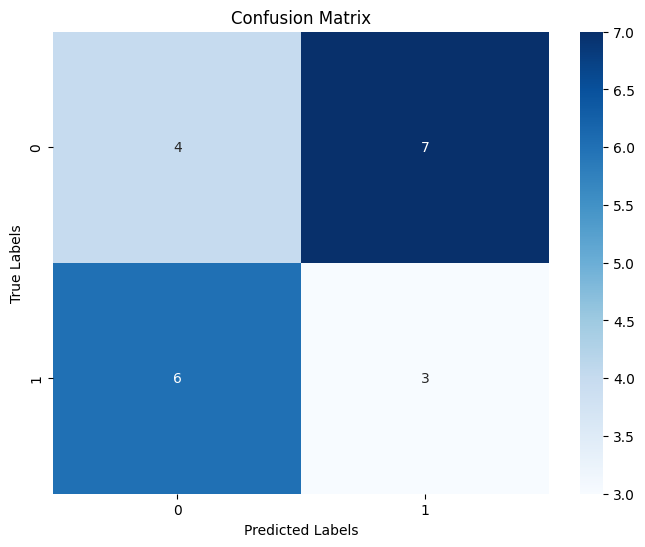

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Adding labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()